In [17]:
import psycopg2

conn = psycopg2.connect(dbname="deeplabcut_db", user="postgres", password=1234)
cursor = conn.cursor()

query = "SELECT DISTINCT ON (health) health, coord_path FROM dlc_files WHERE name IS NOT NULL"
data = pd.read_sql_query(query, conn)

print("Unique names and corresponding coord_path:")
print(data)

conn.close()

Unique names and corresponding coord_path:
       health                                         coord_path
0  Excitatory  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...
1     Ghrelin  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...
2  Inhibitory  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...
3      Saline  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...
4     Unknown  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...


C:\Users\FriedmanLab Optogen\AppData\Local\Temp\ipykernel_27156\2345714566.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


In [2]:
import psycopg2
import pandas as pd
import numpy as np

conn = psycopg2.connect(dbname="deeplabcut_db", user="postgres", password=1234)

query = "SELECT * FROM dlc_files LIMIT 1"
data = pd.read_sql_query(query, conn)
print(data)

conn.close()

   id                                         coord_path     name maze gender  \
0   3  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...  Houston    1   None   

  genotype  health     task  date  \
0     None  Saline  cre_and  None   

                                     normalized_path   distance  time_in_roi  \
0  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...  90.532736        83.32   

   stop_count  acc_outliers  jerk_outliers  
0         164           346            384  


C:\Users\FriedmanLab Optogen\AppData\Local\Temp\ipykernel_28984\1929925795.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


In [32]:
query = "SELECT coord_path, name, maze, health, task FROM dlc_files WHERE task='food_only' AND health='Excitatory'"
# query = "SELECT coord_path FROM dlc_files WHERE task='food_only' AND health='Saline'"

data = pd.read_sql_query(query, conn)
# print(data)
for i in data.iterrows():
    print(i)

(0, coord_path    C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...
name                                                     Grumpy
maze                                                          2
health                                               Excitatory
task                                                  food_only
Name: 0, dtype: object)
(1, coord_path    C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...
name                                                        Ivy
maze                                                          1
health                                               Excitatory
task                                                  food_only
Name: 1, dtype: object)
(2, coord_path    C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...
name                                                        May
maze                                                          2
health                                               Excitatory
task                                        

C:\Users\FriedmanLab Optogen\AppData\Local\Temp\ipykernel_1480\3483019143.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


In [5]:
import pandas as pd
import numpy as np
import os
import psycopg2

# --- Connect to database ---
conn = psycopg2.connect(dbname="deeplabcut_db", user="postgres", password=1234)

C:\Users\FriedmanLab Optogen\AppData\Local\Temp\ipykernel_27156\425991136.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


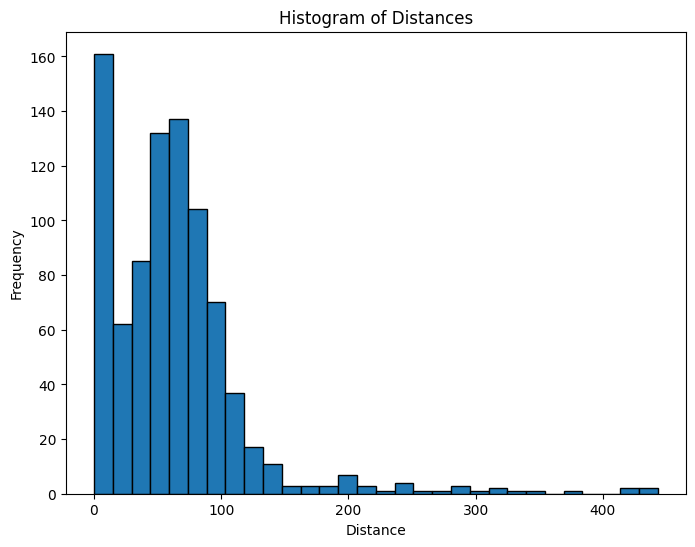

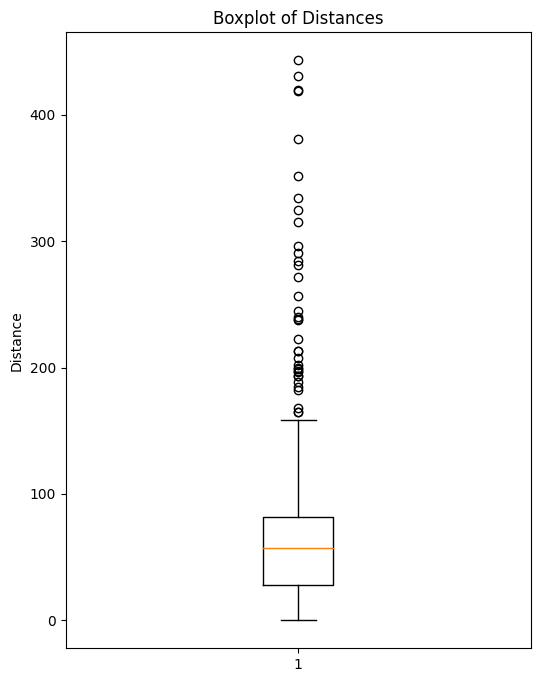

In [10]:
import matplotlib.pyplot as plt

query = "SELECT distance FROM dlc_files"
df = pd.read_sql_query(query, conn)

# Step 2: Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df['distance'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances')
plt.show()

# Step 3: Plot boxplot
plt.figure(figsize=(6, 8))
plt.boxplot(df['distance'].dropna(), vert=True)
plt.ylabel('Distance')
plt.title('Boxplot of Distances')
plt.show()

In [86]:
import importlib
import calculate_time_in_roi_20min

importlib.reload(calculate_time_in_roi_20min)
from calculate_time_in_roi_20min import calculate_time_in_roi_20min

In [87]:
import psycopg2
import pandas as pd
import random

# Connect to your PostgreSQL database
conn = psycopg2.connect(
    dbname="deeplabcut_db",
    user="postgres",
    password="1234",
    host="localhost",
    port="5432"
)

# Fetch normalized paths and maze numbers
query = """
    SELECT normalized_path, maze
    FROM dlc_files
    WHERE normalized_path IS NOT NULL AND maze IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

print(df.head())

                                     normalized_path maze
0  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...    2
1  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...    3
2  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...    4
3  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...    1
4  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...    2


C:\Users\FriedmanLab Optogen\AppData\Local\Temp\ipykernel_27156\1634535681.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


maze = 2, file = C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\NormalizedCSVs\Cre_and_WT_Habituation_Food_and_Maze_1_3_24_S2____E_L_G_H_____Trial_1_top_right_normalized.csv


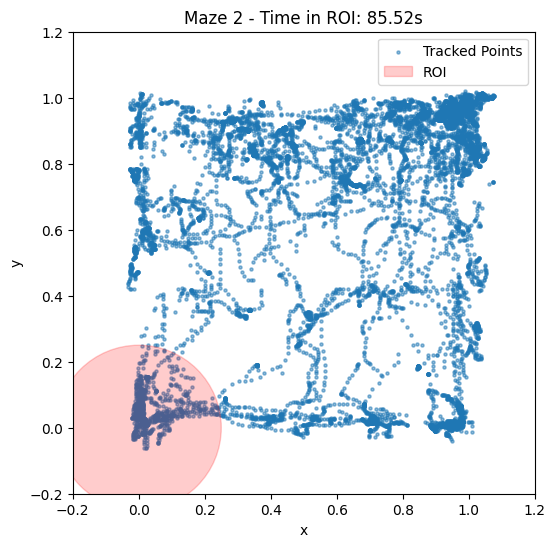

maze = 3, file = C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\NormalizedCSVs\Cre_and_WT_Habituation_Food_and_Maze_1_3_24_S3____J_I_M_None4_____Trial_1_bottom_left_normalized.csv


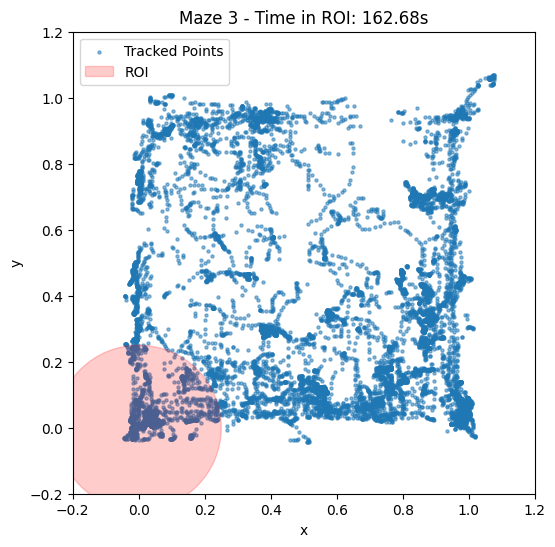

maze = 4, file = C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\NormalizedCSVs\Cre_and_WT_Habituation_Food_and_Maze_1_3_24_S3____J_I_M_None4_____Trial_1_bottom_right_normalized.csv
maze = 1, file = C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\NormalizedCSVs\Cre_and_WT_Habituation_Food_and_Maze_1_3_24_S3____J_I_M_None4_____Trial_1_top_left_normalized.csv


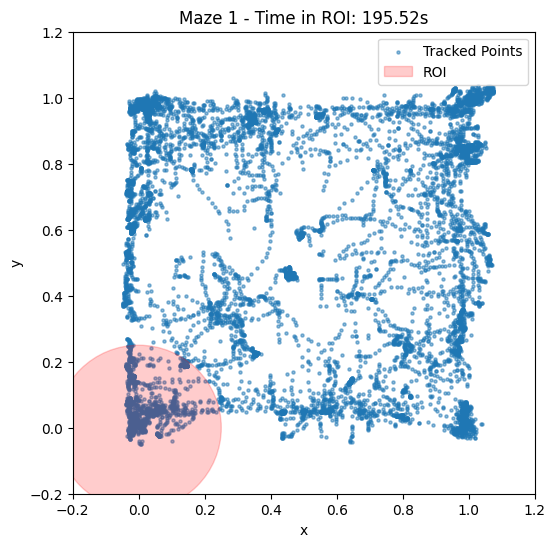

maze = 2, file = C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\NormalizedCSVs\Cre_and_WT_Habituation_Food_and_Maze_1_3_24_S3____J_I_M_None4_____Trial_1_top_right_normalized.csv


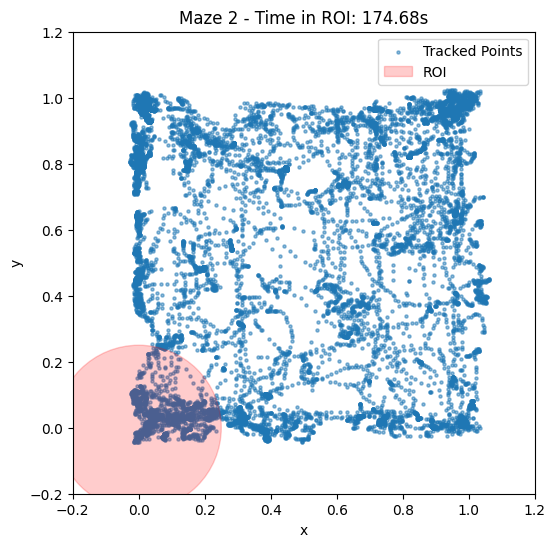

In [88]:
for i in range(5):
    maze = int(df["maze"][i])  # ← cast it to a native Python int
    file = df["normalized_path"][i]
    print(f"maze = {maze}, file = {file}")
    calculate_time_in_roi_20min(file, maze=maze, plot=True)

In [ ]:
updates = []
cursor.execute("""
    ALTER TABLE dlc_files ADD COLUMN IF NOT EXISTS distance FLOAT;
""")
cursor.execute("SELECT id, normalized_path FROM dlc_files")
rows = cursor.fetchall()

for row in rows:
    id_, path = row
    if not is_valid_csv(path, id_):
        continue
    try:
        total_distance = calculate_total_distance_20min(path)
    except Exception as e:
        print(f"Error for ID {id_}: {e}")
        continue

    if total_distance is not None:
        updates.append((total_distance, id_))
        print(f"Updated distance for ID {id_}: {total_distance:.2f}")
    else:
        print(f"Skipping ID {id_} — calculation failed.")

if updates:
    cursor.executemany("UPDATE dlc_files SET distance = %s WHERE id = %s", updates)

In [ ]:
import psycopg2
import pandas as pd
import numpy as np

conn = psycopg2.connect(dbname="deeplabcut_db", user="postgres", password=1234)

query = "SELECT * FROM dlc_files LIMIT 1"
data = pd.read_sql_query(query, conn)
print(data)

conn.close()

In [7]:
import psycopg2

conn = psycopg2.connect(dbname="deeplabcut_db", user="postgres", password=1234)

query = "SELECT normalized_path FROM dlc_files  ORDER BY id LIMIT 5"
data = pd.read_sql_query(query, conn)
print(data)

                                     normalized_path
0  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...
1  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...
2  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...
3  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...
4  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...


C:\Users\FriedmanLab Optogen\AppData\Local\Temp\ipykernel_1480\4112095132.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


In [8]:
import importlib
import count_stopping_points

importlib.reload(count_stopping_points)
from count_stopping_points import count_stopping_points

C:\Users\FriedmanLab Optogen\AppData\Local\Temp\ipykernel_1480\3293898920.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)



📂 Processing file 1: C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\NormalizedCSVs\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1____Houston_Austin_Toronto_Berlin_____Trial_1_bottom_left_normalized.csv


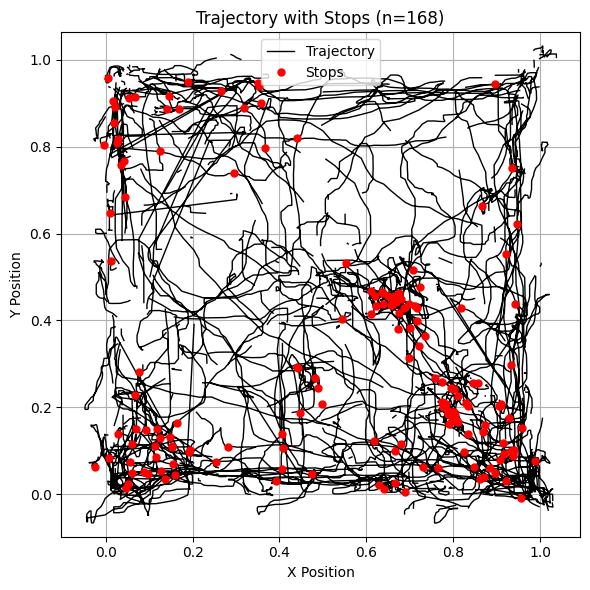

🛑 Stopping points: 168

📂 Processing file 2: C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\NormalizedCSVs\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1____Houston_Austin_Toronto_Berlin_____Trial_1_bottom_right_normalized.csv


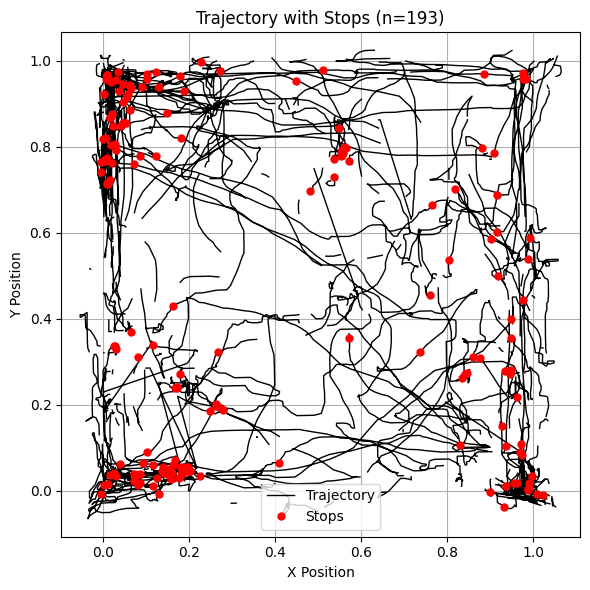

🛑 Stopping points: 193

📂 Processing file 3: C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\NormalizedCSVs\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1____Houston_Austin_Toronto_Berlin_____Trial_1_top_left_normalized.csv


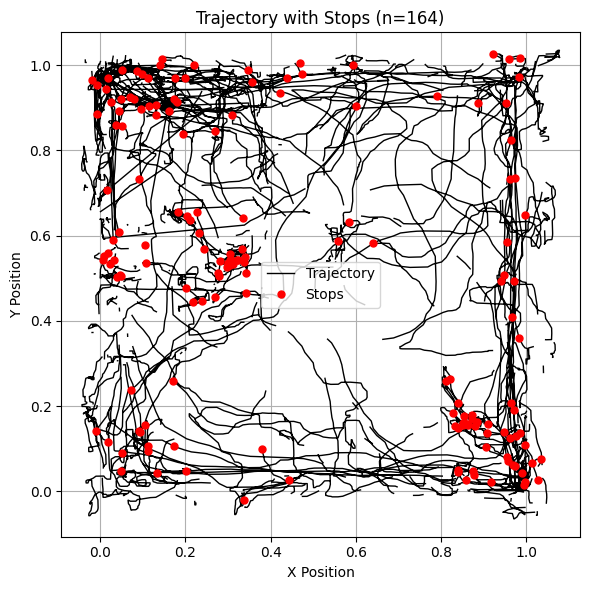

🛑 Stopping points: 164

📂 Processing file 4: C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\NormalizedCSVs\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1____Houston_Austin_Toronto_Berlin_____Trial_1_top_right_normalized.csv


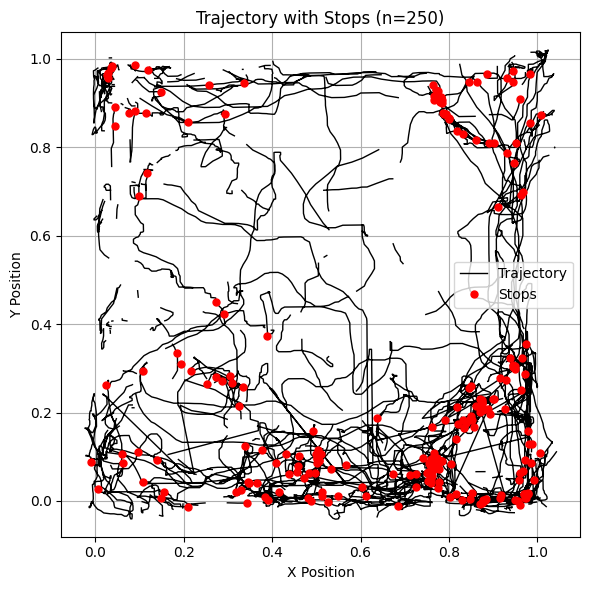

🛑 Stopping points: 250

📂 Processing file 5: C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\NormalizedCSVs\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S2____Denver_ElPaso_Waco_FtWorth_____Trial_1_bottom_left_normalized.csv


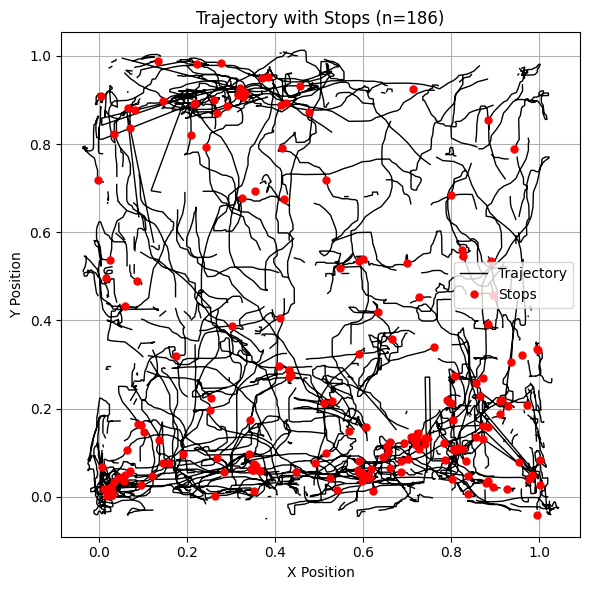

🛑 Stopping points: 186


In [9]:
import pandas as pd
import psycopg2
from count_stopping_points import count_stopping_points

# Connect to the database
conn = psycopg2.connect(dbname="deeplabcut_db", user="postgres", password=1234)

# Query first 5 normalized file paths
query = "SELECT normalized_path FROM dlc_files ORDER BY id LIMIT 5"
data = pd.read_sql_query(query, conn)
conn.close()

# Loop through and plot
for i, row in data.iterrows():
    path = row['normalized_path']
    print(f"\n📂 Processing file {i+1}: {path}")
    count = count_stopping_points(path, plot=True)
    print(f"🛑 Stopping points: {count}")

C:\Users\FriedmanLab Optogen\AppData\Local\Temp\ipykernel_19272\4176317925.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)



Processing file 1: C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\NormalizedCSVs\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1____Houston_Austin_Toronto_Berlin_____Trial_1_bottom_left_normalized.csv


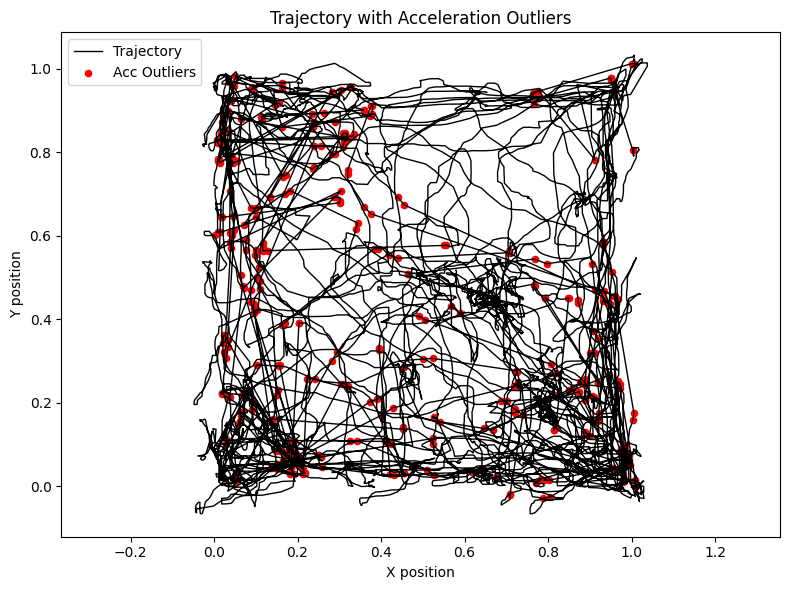

acc_outliers: 375, jerk_outliers: 422

Processing file 2: C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\NormalizedCSVs\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1____Houston_Austin_Toronto_Berlin_____Trial_1_bottom_right_normalized.csv


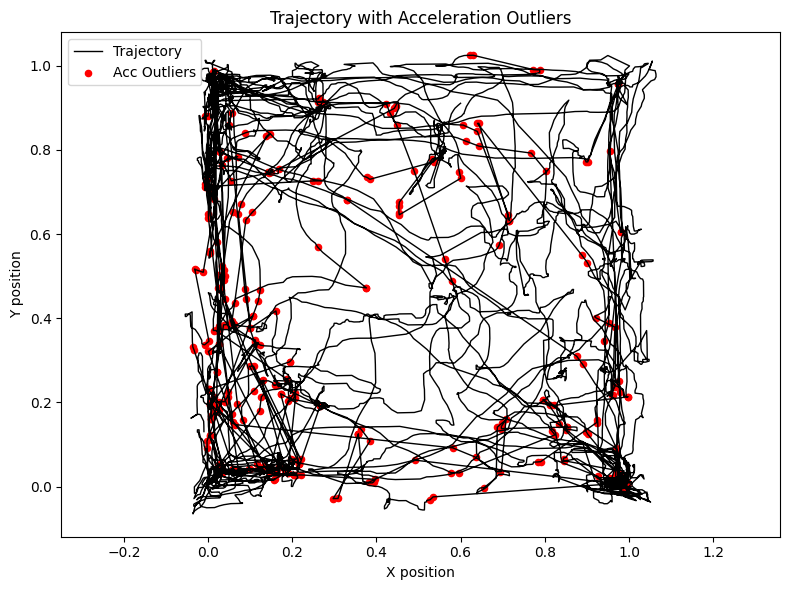

acc_outliers: 299, jerk_outliers: 307


In [7]:
import pandas as pd
import psycopg2
from calculate_acc_jerk_outliers import calculate_acc_jerk_outliers

# Connect to the database
conn = psycopg2.connect(dbname="deeplabcut_db", user="postgres", password=1234)

# Query first 5 normalized file paths
query = "SELECT normalized_path FROM dlc_files ORDER BY id LIMIT 2"
data = pd.read_sql_query(query, conn)
conn.close()

# Loop through and plot
for i, row in data.iterrows():
    path = row['normalized_path']
    print(f"\nProcessing file {i+1}: {path}")
    acc_outliers, jerk_outliers = calculate_acc_jerk_outliers(path, plot=True)
    print(f"acc_outliers: {acc_outliers}, jerk_outliers: {jerk_outliers}")

In [8]:
from update_outliers_to_db import update_outliers_to_db
update_outliers_to_db()

C:\DeepLabCutProjects\Python_scripts\update_outliers_to_db.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT id, normalized_path FROM dlc_files WHERE normalized_path IS NOT NULL", conn)


✅ ID 69: acc=313, jerk=353
✅ ID 88: acc=1740, jerk=896
✅ ID 108: acc=286, jerk=256
✅ ID 123: acc=425, jerk=342
✅ ID 136: acc=860, jerk=741
✅ ID 161: acc=266, jerk=246
✅ ID 214: acc=243, jerk=206
✅ ID 230: acc=241, jerk=216
✅ ID 243: acc=364, jerk=360
✅ ID 246: acc=194, jerk=194
✅ ID 280: acc=260, jerk=238
✅ ID 318: acc=190, jerk=238
✅ ID 321: acc=346, jerk=315
✅ ID 335: acc=401, jerk=432
✅ ID 361: acc=393, jerk=378
✅ ID 380: acc=277, jerk=304
✅ ID 402: acc=232, jerk=252
✅ ID 443: acc=275, jerk=254
✅ ID 465: acc=364, jerk=422
✅ ID 484: acc=432, jerk=341
✅ ID 181: acc=101, jerk=130
✅ ID 511: acc=193, jerk=189
✅ ID 525: acc=413, jerk=513
✅ ID 228: acc=260, jerk=301
✅ ID 241: acc=123, jerk=160
✅ ID 244: acc=247, jerk=308
✅ ID 254: acc=270, jerk=260
✅ ID 262: acc=208, jerk=206
✅ ID 278: acc=292, jerk=266
✅ ID 295: acc=330, jerk=316
✅ ID 297: acc=398, jerk=333
✅ ID 316: acc=251, jerk=250
✅ ID 355: acc=488, jerk=470
✅ ID 89: acc=335, jerk=379
✅ ID 595: acc=229, jerk=217
✅ ID 832: acc=372, jer